In [3]:
import pandas as pd

In [4]:
file_path= "final_dataset.csv"

In [5]:
chunk_size = 200000  # Adjust based on memory availability
filtered_chunks = []

for chunk in pd.read_csv(file_path, chunksize=chunk_size, on_bad_lines='skip', encoding='utf-8', low_memory=False):
    filtered_chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
df = pd.concat(filtered_chunks, ignore_index=True)
del filtered_chunks
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79862 entries, 0 to 79861
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   energy_100g           79862 non-null  float64
 1   saturated_fat_100g    79862 non-null  float64
 2   sugars_100g           79862 non-null  float64
 3   fiber_100g            79862 non-null  float64
 4   proteins_100g         79862 non-null  float64
 5   salt_100g             79862 non-null  float64
 6   fruits_veg_nuts_100g  79862 non-null  float64
 7   nutriscore_grade      79862 non-null  object 
dtypes: float64(7), object(1)
memory usage: 4.9+ MB
None


HISTOGRAM

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd

# Check class distribution
print(df['nutriscore_grade'].value_counts())


nutriscore_grade
e    23840
c    23117
b    17225
d    12612
a     3068
Name: count, dtype: int64


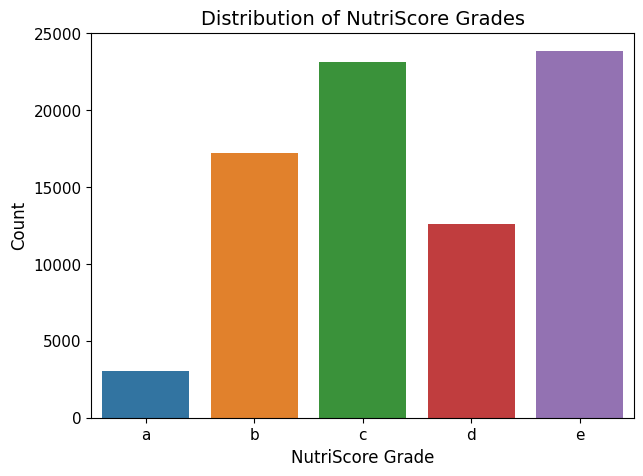

In [8]:
# Count occurrences of each category
value_counts = df['nutriscore_grade'].value_counts().sort_index()  # Sort to maintain 'A'-'E' order

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index)

# Labels and title
plt.xlabel("NutriScore Grade", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of NutriScore Grades", fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Show plot
plt.show()


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numeric_features = ["energy_100g", "saturated_fat_100g", "sugars_100g", 
                    "fiber_100g", "proteins_100g", "salt_100g", "fruits_veg_nuts_100g"]

# Standardize using StandardScaler
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

PAIR PLOT

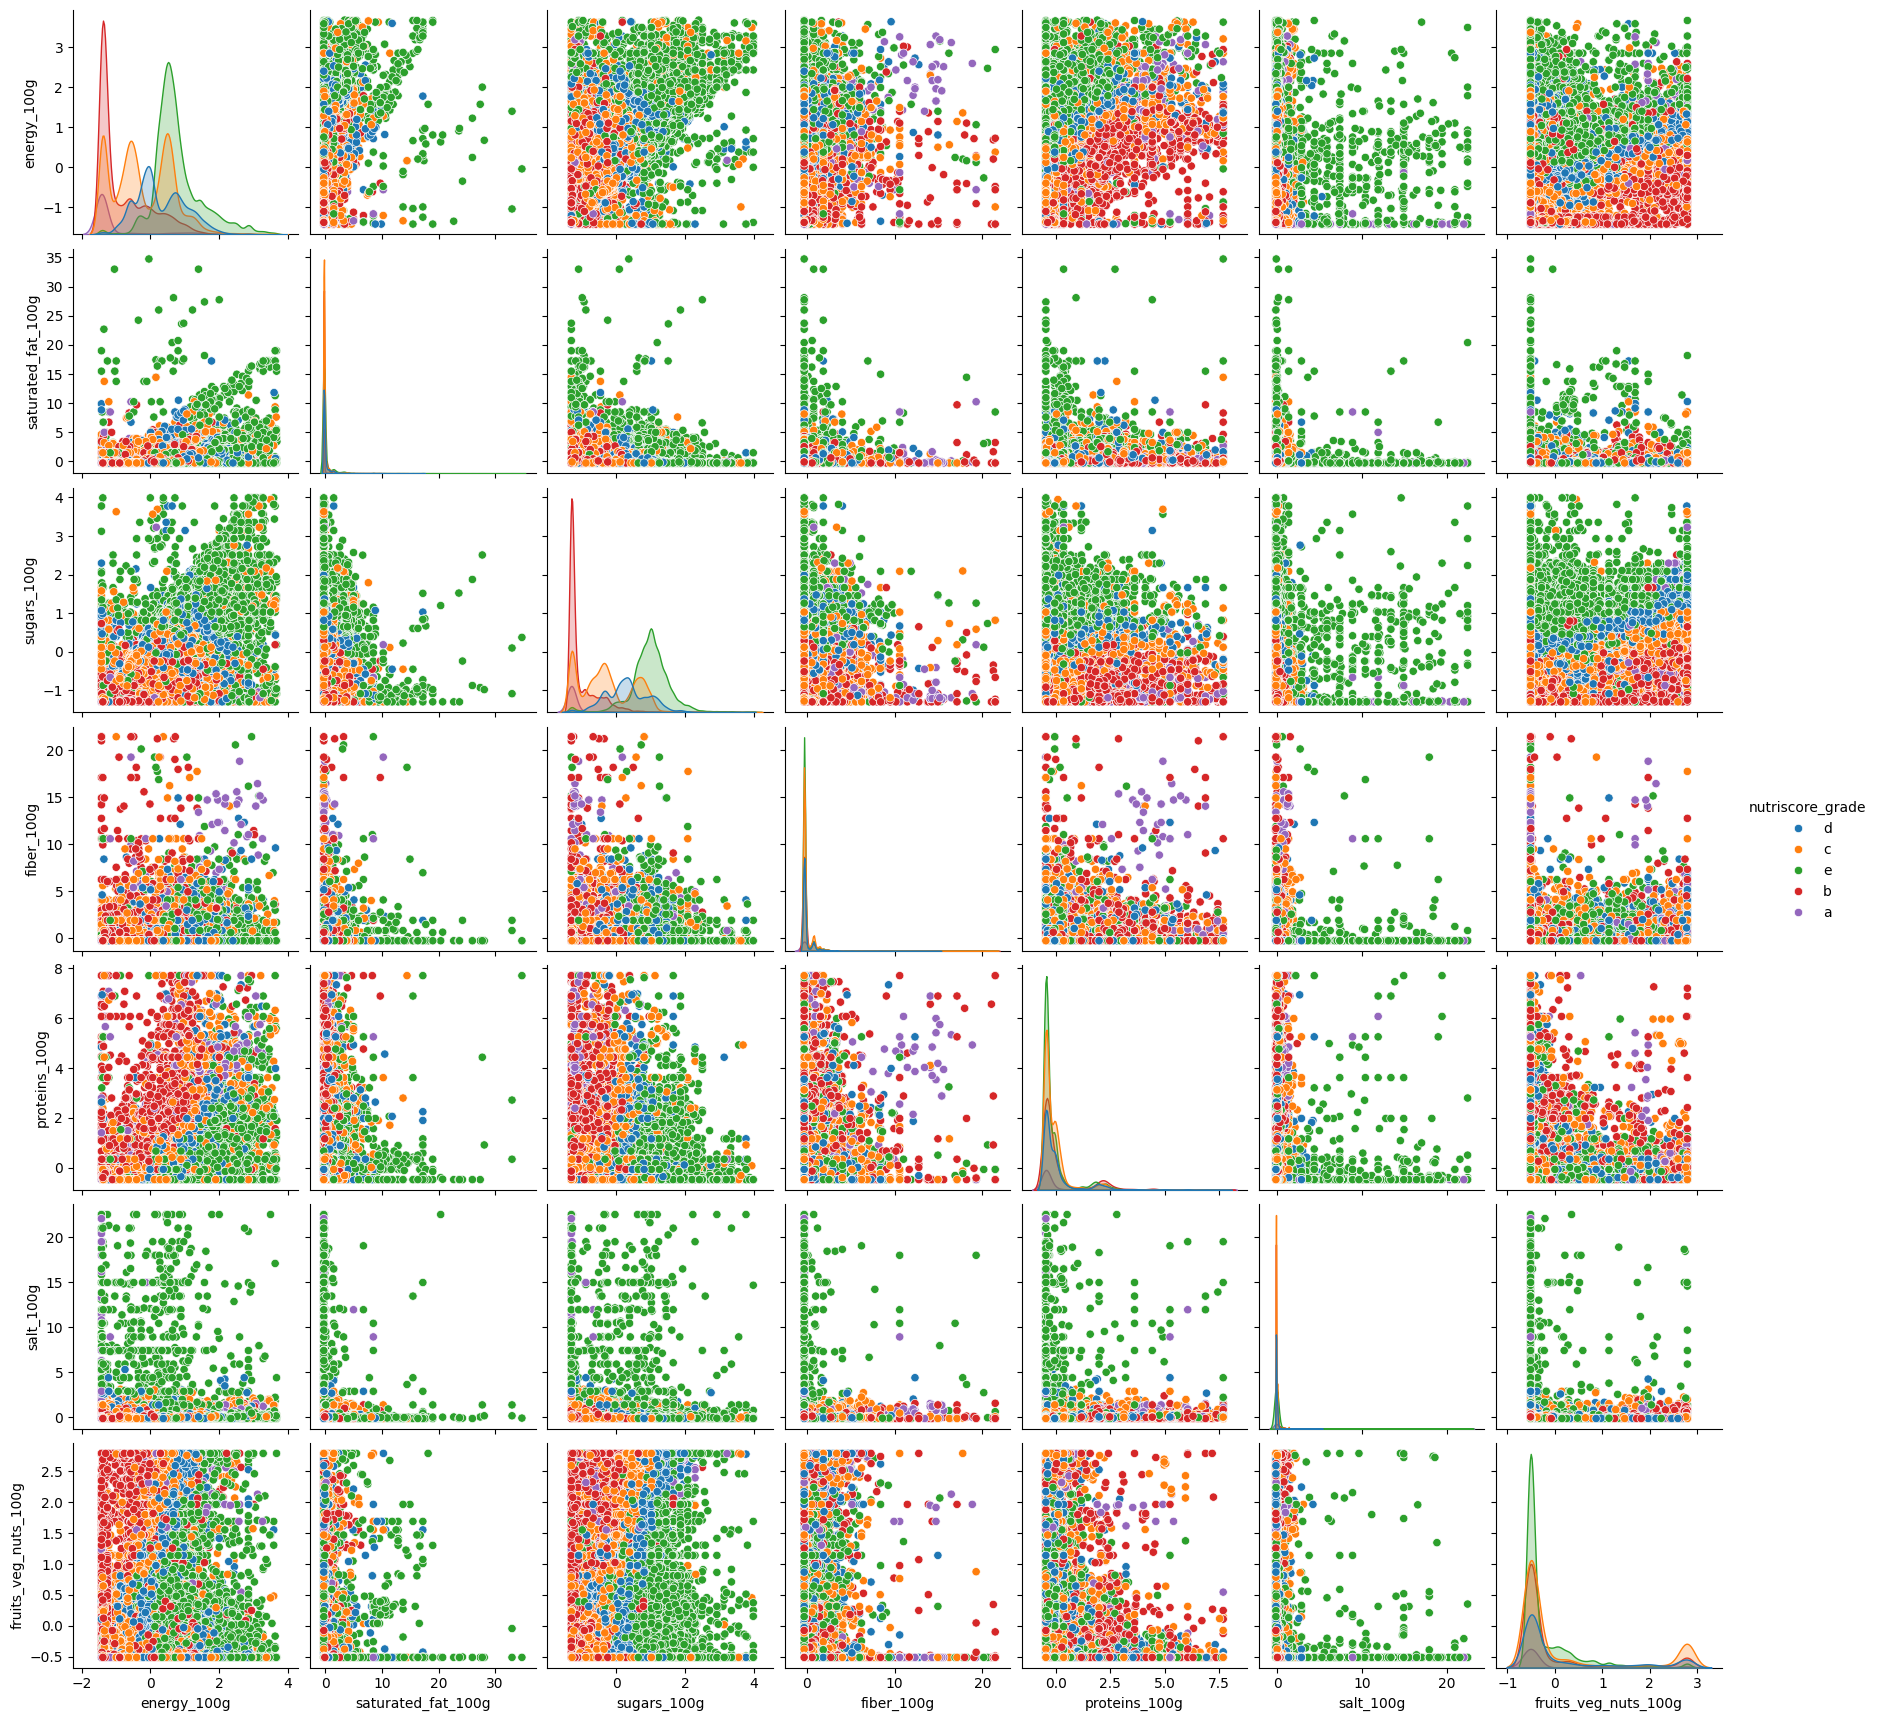

In [10]:
pairplot = sns.pairplot(data=df, hue = "nutriscore_grade", corner = False)
plt.show()
# Save the figure
# pairplot.savefig("/kaggle/working/pairplot.png", dpi=300)  # High resolution

# Display confirmation
# print("Pairplot saved as 'pairplot.png' in /kaggle/working/")

CORRELATION MATRIX

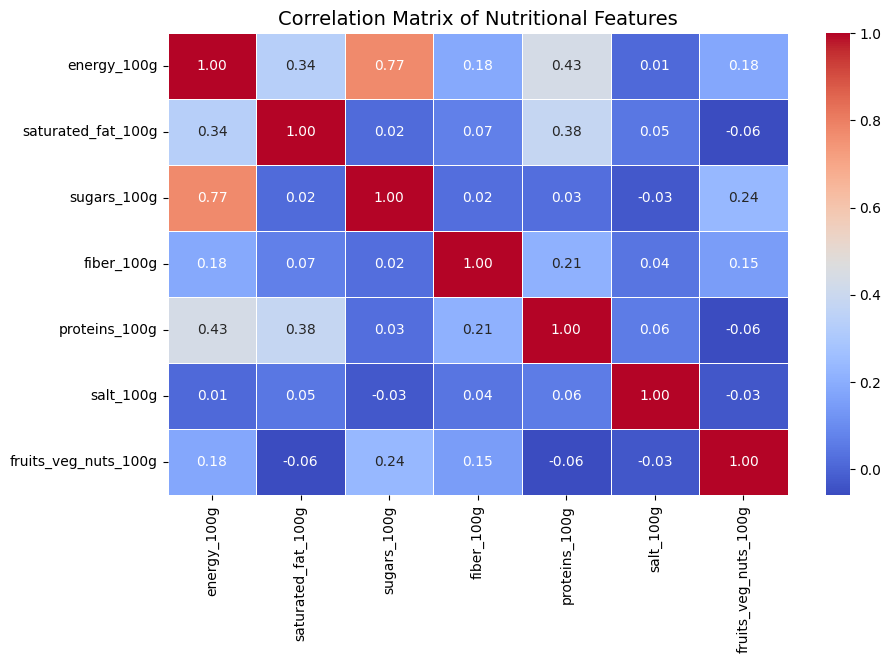

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df2 = df.drop(columns='nutriscore_grade')
# Compute correlation matrix
corr_matrix = df2.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Matrix of Nutritional Features", fontsize=14)

# Save the plot
# plt.savefig("/kaggle/working/correlation_matrix.png", dpi=300)

# Show plot
plt.show()

# print("Correlation matrix saved as 'correlation_matrix.png' in /kaggle/working/")
